# Demo: Convolutional Neural Networks

This Jupyter notebook have been prepared for demonstartion purpose of how a Convolutional Neural Network operates in order to address a typical classification problem.

The dataset used in this demo is the Fashion MNIST datatset, and is publically available from Keras free datasets.

# Name: Muhammad Abubaker
# Email: mabubaker1947@outlook.com
# Git:      https://github.com/mabubaker1947

We will conduct following
- the necessary preprocessing steps,
- and then define,
- train,
- and test a convolutional neural network model

on image data. The data consists of images of clothing.

Now, lets begin by loading some of the required packages:

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import numpy as np

import pandas as pd
from pandas import read_csv

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import time as time

import keras

from keras.utils import to_categorical
# Either Keras or Sklearn function can be used for one-hot encodong
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split


%matplotlib inline

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Load the Dataset

The two distinct datasets are loaded; one for training and one for testing. These are stored in the corresponding training and testing sets.

In [3]:
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


## Exploratory Data Analysis: (EDA)

A dictionary key is defined below with the corresponding class name for each of the integer encoded values in y_train and y_test.

In [4]:
key = {0:"T-shirt/top",1:"Trouser",2:"Pullover",3:"Dress",4:"Coat",
       5:"Sandal",6:"Shirt",7:"Sneaker",8:"Bag",9:"Ankle boot"}

- Print the values of an individual sample from X_train

In [7]:
print("X train data\n",X_train)

X train data
 [[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [13]:
print("Lets see how does out put data look like /n:",y_train)

Lets see how does out put data look like /n: [9 0 0 ... 3 0 5]


- Check the shape of the sample

In [8]:
print("X train shape\t",X_train.shape)

X train shape	 (60000, 28, 28)


- Lets Plot few sample images from X_train using the 'imshow' routine in matplotlib 

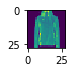

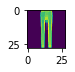

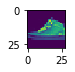

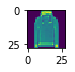

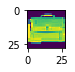

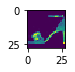

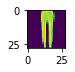

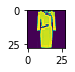

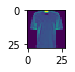

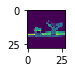

In [12]:
#test_image = X_train[0]
#print(test_image)
#plt.imshow(X_train[0])
#plt.show()
#plt.imshow(X_train[1])
#plt.show()
#plt.imshow(X_train[2])
#plt.show()
''' Last 10 Sample Images in our dataset'''

for sample in range(59990,60000):
    plt.figure(figsize=(0.7, 0.7))
    plt.imshow(X_train[sample])
    plt.show()

- Plot the frequencies of the output variable vlaues for both the training and the test sets
- How are each of the datasets distributed?

Shape y_train =  (60000,)
Shape y_test =  (10000,)


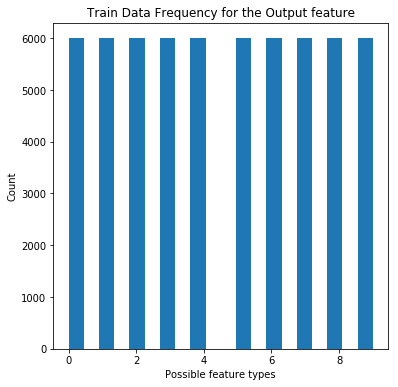

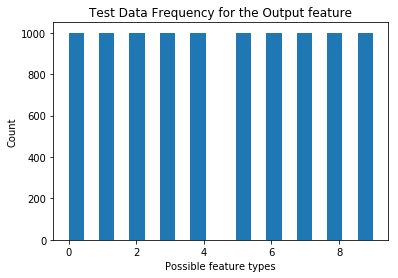

In [19]:
print("Shape y_train = ",y_train.shape)
print("Shape y_test = ",y_test.shape)


# Plot Training
fig = plt.figure(figsize=(6,6))
plt.hist(y_train.reshape(y_train.shape[0],1), bins=20)
plt.title("Train Data Frequency for the Output feature")
plt.xlabel("Possible feature types")
plt.ylabel("Count")
plt.show()

# Plot Testing
plt.hist(y_test.reshape(y_test.shape[0],1), bins=20)
plt.title("Test Data Frequency for the Output feature")
plt.xlabel("Possible feature types")
plt.ylabel("Count")
plt.show()

#Look like that output data is equally distributed among all the possible outputs.

# Preprocessing

### OneHot Encoding:
- Encode the output features using one-hot encoding for the training and test data

**One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction**

In [22]:
### Answer B3
y_OneHotEncoder = OneHotEncoder(sparse=False)
y_OneHotEncoder.fit(y_test.reshape(-1,1))
y_binary_train = y_OneHotEncoder.transform(y_train.reshape(-1,1))
y_binary_test = y_OneHotEncoder.transform(y_test.reshape(-1,1))

print(y_binary_train)
print(y_binary_test)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Our neural network and the below 'ImageDataGenerator' function expects each image sample to be of a specific format. Therefore it is necessary to reshape each image in our datasets to the expected format. The expected format is structured so that the indices correspond to [samples][width][height][channel].

It is also good to cast the data from integer to floating point numbers.

In [23]:
'''Lets see what is the current shape of data'''
print("Shape of X_train:\t",X_train.shape)
print("Shape of X_test:\t",X_test.shape)

# reshape to be [samples][width][height][channel]
# use reshape(-1,28,28,1) as (add new col, 28, 28, size)
X_train_reshaped = X_train.reshape(-1,28,28,1)
X_test_reshaped = X_test.reshape(-1,28,28,1)

'''New shape with the datatype of data'''
print("Shape of X_train_reshaped:\t",X_train_reshaped.shape, X_train_reshaped.dtype)
print("Shape of X_test_reshaped:\t",X_test_reshaped.shape, X_test_reshaped.dtype)


# convert from int to float
X_train_reshaped = X_train_reshaped.astype(float)
X_test_reshaped = X_test_reshaped.astype(float)

Shape of X_train:	 (60000, 28, 28)
Shape of X_test:	 (10000, 28, 28)
Shape of X_train_reshaped:	 (60000, 28, 28, 1) uint8
Shape of X_test_reshaped:	 (10000, 28, 28, 1) uint8


### ImageDataGenerator:
**Note:** If you augment your training data using a generator defined by 'ImageDataGenerator', it is important that you do **not** use the same generator for the testing data. Therefore, if you decide to augment your dataset, you will need to specify a second generator which scales in the same way as the training generator but does not augment your dataset. If you do not augment your dataset, the same generator can be used for training and testing datasets (but you must still fit the generator on only the training dataset).

X_train_reshaped shape:	 (60000, 28, 28, 1)
X_test_reshaped shape:	 (10000, 28, 28, 1)


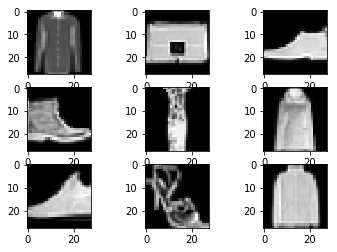

In [25]:
from keras.preprocessing.image import ImageDataGenerator

# Define Image Data Generator
datagen_train = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

datagen_test = ImageDataGenerator(rescale= 1./255)


# Fit parameters from data
datagen_train.fit(X_train_reshaped)
datagen_test.fit(X_test_reshaped)

print("X_train_reshaped shape:\t",X_train_reshaped.shape)
print("X_test_reshaped shape:\t",X_test_reshaped.shape)

j = 0
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen_train.flow(X_train_reshaped, y_binary_train, batch_size=9):
    # create a grid of 3x3 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    # show the plot
    plt.show()
    break

# Define CNN

- Lets Define a neural network which classifies an input sample. The neural network is structured as follows:
    - An input convolutional layer with multiple filters. You must ensure your **'input_shape'** parameter is set appropriately. An appropriate filter size for the image size should be chosen.
    - A Max Pooling layer with an appropriate size
    - A second convolutional layer with appropriate parameters
    - A second Max Pooling layer
    - You can add more convolution and pooling layers if you wish
    - Ensure you 'flatten' your outputs before they are inputted to your fully connected layers
    - Your choice of fully connected layers
    - A fully connected output layer
    - Finally, Compile your model using an appropriate choice of optimizer and loss function. Ensure you collect the 'accuracy' metric


In [28]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

# Define neural network:
net = Sequential()

# Input Convolution Layer
#keras.layers.Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1),
#                   activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', 
#   kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)

net.add(Conv2D(64, (3), input_shape=(28,28,1), activation='relu'))

#Normalize the input layer's data
#net.add(BatchNormalization())
# Max Pooling
net.add(MaxPooling2D(pool_size=(2,2)))
net.add(Dropout(0.1))

# Second Convolution Layer
net.add(Conv2D(128, (3), input_shape=(13, 13, 64), activation='relu'))
# Max Pooling
net.add(MaxPooling2D(pool_size=(2,2)))
net.add(Dropout(0.2))


# Insert more Convolution and/or Pooling layers if you desire here
net.add(Conv2D(256, (3), input_shape=(5, 5, 128), activation='relu'))
# Max Pooling
net.add(MaxPooling2D(pool_size=(2,2)))
# Flatten from matrix to array for input to fully connected layers
net.add(Flatten())

# Insert fully connected layers here
net.add(Dense(units=64, activation='relu'))

# Define Fully Connected Output Layer
net.add(Dense(units=10, activation='softmax'))

# Compile model
net.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

- Output the summary of your neural network. Ensure the number of weights in your network is appropriate for the number of samples the model will be trained on 

In [27]:
net.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 256)         295168    
__________

# Train and Evaluate Model in Batches


- Fit your neural network in batches using the test set to generate validation metrics for each epoch during training (validate in batches too). Note:
    - you should use the 'fit_generator' routine to fit the model (see docs: https://keras.io/models/sequential/)
    - the 'generator' argument should be the 'flow' routine called on the data generator previously defined with the appropriate dataset
    - the argument to conduct the validation should similarly be set to the generator with the appropriate dataset
    - a relatively small number of epochs is needed to train your model (it will take quite a while to complete). Try starting with 25 epochs and adjust if required

In [61]:
### Answer D1
# Fit the model on batches and evaluate
batch_size = 15
training_set = datagen_train.flow(X_train_reshaped, y_binary_train, batch_size=batch_size)
test_set = datagen_test.flow(X_test_reshaped, y_binary_test, batch_size=batch_size)

no_of_steps = int(len(training_set)/batch_size)
print("Length of trainig set:\t",len(training_set),"\nno of steps:\t",no_of_steps)
start = time.time()
cnn_model = net.fit_generator(training_set, epochs=500, validation_data=test_set, steps_per_epoch=no_of_steps, validation_steps=no_of_steps)
end = time.time()
print("Time to train Model:\t", float((end-start)/60)," minutes")

Length of trainig set:	 4000 
no of steps:	 266
Epoch 1/500
266/266 [==============================] - 6s 23ms/step - loss: 1.1509 - acc: 0.5672 - val_loss: 0.7768 - val_acc: 0.7095
Epoch 2/500
266/266 [==============================] - 5s 18ms/step - loss: 0.7609 - acc: 0.7180 - val_loss: 0.7318 - val_acc: 0.7288
Epoch 3/500
266/266 [==============================] - 5s 19ms/step - loss: 0.7155 - acc: 0.7281 - val_loss: 0.6361 - val_acc: 0.7541
Epoch 4/500
266/266 [==============================] - 5s 18ms/step - loss: 0.6567 - acc: 0.7599 - val_loss: 0.6405 - val_acc: 0.7499
Epoch 5/500
266/266 [==============================] - 5s 19ms/step - loss: 0.6335 - acc: 0.7604 - val_loss: 0.5826 - val_acc: 0.7810
Epoch 6/500
266/266 [==============================] - 5s 19ms/step - loss: 0.6473 - acc: 0.7504 - val_loss: 0.5708 - val_acc: 0.7804
Epoch 7/500
266/266 [==============================] - 5s 18ms/step - loss: 0.5858 - acc: 0.7779 - val_loss: 0.5659 - val_acc: 0.7812
Epoch 8/500
26

- Take note of you loss and accuracy scores on both the training and validation for each epoch. Do these values converge?
- You should produce a model that has a test accuracy greater than 95% and that is deemed not to overfit.

Some things you might want to consider changing to increase the performance of your model:
        - often a simpler preprocessing stage can lead to better performance
        - for this dataset, augmentation is not really necessary as the data quality is good and the training and testing datasets are distinct yet similar and well distributed
        - a relatively simple model should result in good performance
        - For the 'fit_generator', try setting the step size to the length of the training set divided by the batch size (probably won't effect performance too much but is good form to use all data in batches
        

The model can be evaluated using the 'evaluate_generator' class routine. This will yield the same evaluation metric collected at the end of the final training epoch for the validation on the test data. Therefore calculating it again below is redundant.

In [66]:
# This is the same evaluation as to that which was done on the test data at the end of the final epoch 
# during training. 
net.evaluate_generator(test_set, steps=100)

[0.2940726980473846, 0.8913333398103714]

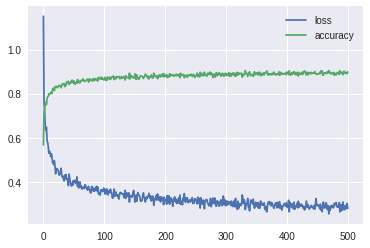

In [67]:
print(cnn_model)
# Define a function which plots training accuracy and loss across
# the different epochs.
def plot_loss_acc(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['acc'], label='accuracy')
    plt.legend()
    plt.show()

plot_loss_acc(cnn_model)

Below is a method which predicts the class of a batch sampled from the generator on the test data. The image is then printed along with the predicted and true class. Whether the prediction was correct was also outputted. Note that this would have been done for all batches in the test data if the 'break' statement was removed at the bottom of the for-loop. 

9/9 [==============================] - 0s 404us/step


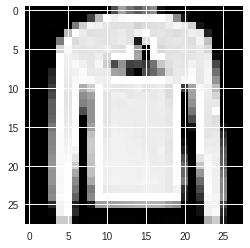

Predicted Label:  Pullover
True Label:  Pullover
Correct


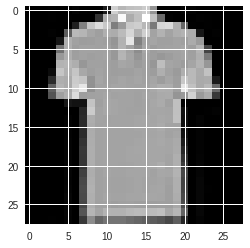

Predicted Label:  T-shirt/top
True Label:  T-shirt/top
Correct


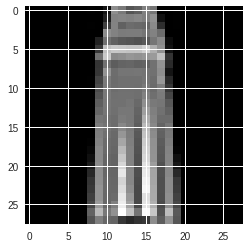

Predicted Label:  Dress
True Label:  Dress
Correct


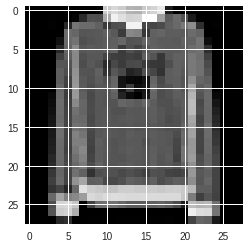

Predicted Label:  Pullover
True Label:  Pullover
Correct


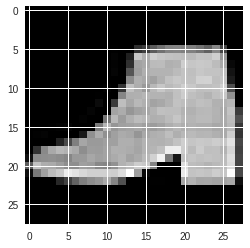

Predicted Label:  Ankle boot
True Label:  Ankle boot
Correct


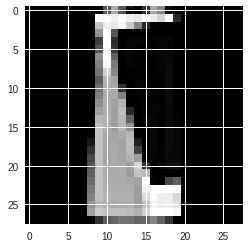

Predicted Label:  Bag
True Label:  Dress
Incorrect


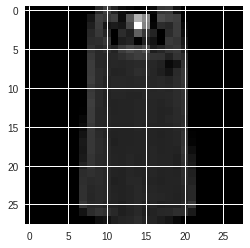

Predicted Label:  T-shirt/top
True Label:  T-shirt/top
Correct


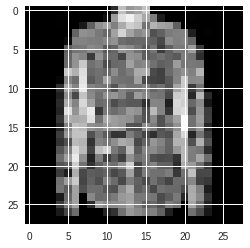

Predicted Label:  Shirt
True Label:  Shirt
Correct


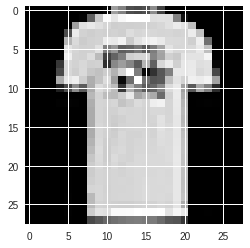

Predicted Label:  T-shirt/top
True Label:  T-shirt/top
Correct


In [69]:
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen_test.flow(X_test_reshaped, y_test, batch_size=9):
    # Get predicted values of each test sample but also convert from 1-hot to the corresponding class'
    # integer representation.
    #y_pred_as_integers = net.predict_on_batch(X_batch)
    #y_pred_as_integers = net.predict_on_batch(X_batch)
    y_pred_as_integers= net.predict_classes(X_batch, batch_size=9, verbose=1)

    # create a grid of 3x3 images
    for i in range(0, 9):
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
        
        # show the plot
        plt.show()
        
        print("Predicted Label: ",key[y_pred_as_integers[i]])
        print("True Label: ",key[y_batch[i]])
        if(y_pred_as_integers[i] == y_batch[i]):
            print("Correct")
        else:
            print("Incorrect")

    break

    
